In [52]:
import os
import re
import subprocess
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [53]:
df = pd.read_csv(r'D:\bgx\citha\UlasanGRAB_CaseFold.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold,replyContent_casefold,score_casefold
0,a0cf7bab-bc98-4e08-a45a-a522d8f17e27,Siswanto Yuda,https://play-lh.googleusercontent.com/a/ACg8oc...,pengalaman terburuk saya semalam dokumen saya ...,1,0,NaN,2025-10-16 22:27:07,NaN,NaN,NaN,pengalaman terburuk saya semalam dokumen saya ...,none,1
1,7473bdd0-2bc5-46c9-b577-b657633b4625,Ade Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Masih Banyak Driver yang meminta uang lebih da...,1,0,5.378.0,2025-10-16 21:42:08,Halo Kak. Maaf ya buat enggak nyaman 🙇‍♀️\nApa...,2025-10-17 05:33:46,5.378.0,masih banyak driver yang meminta uang lebih da...,halo kak. maaf ya buat enggak nyaman 🙇‍♀️\napa...,1
2,efecdfbc-3f24-4363-8c58-0f8c09ec5fa6,Joko Joko,https://play-lh.googleusercontent.com/a/ACg8oc...,"recomen,bnyk membantu",5,0,5.378.0,2025-10-16 21:13:40,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:16:57,5.378.0,"recomen,bnyk membantu","hai kak, terima kasih banyak sudah menjadi pen...",5
3,04728ccf-1a2a-4a33-84b4-bf383ddbb066,Pink Ade,https://play-lh.googleusercontent.com/a/ACg8oc...,fdk bisa atur ulang aplikasi greb,1,0,5.375.0,2025-10-16 19:53:56,NaN,NaN,5.375.0,fdk bisa atur ulang aplikasi greb,none,1
4,69907170-4cba-4269-9863-39ee0d990682,Sten Paty,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,5.377.0,2025-10-16 18:16:09,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:17:00,5.377.0,bagus,"hai kak, terima kasih banyak sudah menjadi pen...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1d608c41-5bd3-4cee-8720-dea80ac5a226,Elena Hutagalung,https://play-lh.googleusercontent.com/a/ACg8oc...,pesanan cepat dan enak,5,0,5.377.0,2025-10-08 15:20:34,NaN,NaN,5.377.0,pesanan cepat dan enak,none,5
996,0b911bc9-9557-4a3b-98f0-1cfc38e9b4d1,Triyono Triyono,https://play-lh.googleusercontent.com/a/ACg8oc...,puas,5,0,5.377.0,2025-10-08 15:08:31,NaN,NaN,5.377.0,puas,none,5
997,ac21f527-e8c4-4fae-99ba-9361e7d98061,Mhd Mahadir,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong dong untuk driver nya, wilayah kota Med...",1,0,5.377.0,2025-10-08 14:53:33,Maaf ya atas ketidaknyamanan yang terjadi.\nKa...,2025-10-09 05:14:58,5.377.0,"tolong dong untuk driver nya, wilayah kota med...",maaf ya atas ketidaknyamanan yang terjadi.\nka...,1
998,8d3a9ab8-bfc0-4a42-a790-c7abe9c4f3a6,Ardi Yanuarto,https://play-lh.googleusercontent.com/a/ACg8oc...,memudahkan akses mau kemana aja,5,0,NaN,2025-10-08 14:51:19,NaN,NaN,NaN,memudahkan akses mau kemana aja,none,5


In [ ]:
kolom1 = 'content_casefold'
kolom2 = 'replyContent_casefold'

# 1. == Stopwords Removal == 
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    if isinstance(text, str):
        text = text.lower()  # ubah jadi huruf kecil
        text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
        words = text.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ""

df['content_stopword'] = df[kolom1].apply(remove_stopwords)
df["replyContent_stopword"] = df[kolom2].apply(remove_stopwords)

df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold,replyContent_casefold,score_casefold,content_stopword,replyContent_stopword
0,a0cf7bab-bc98-4e08-a45a-a522d8f17e27,Siswanto Yuda,https://play-lh.googleusercontent.com/a/ACg8oc...,pengalaman terburuk saya semalam dokumen saya ...,1,0,NaN,2025-10-16 22:27:07,NaN,NaN,NaN,pengalaman terburuk saya semalam dokumen saya ...,none,1,pengalaman terburuk semalam dokumen driver tf ...,none
1,7473bdd0-2bc5-46c9-b577-b657633b4625,Ade Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Masih Banyak Driver yang meminta uang lebih da...,1,0,5.378.0,2025-10-16 21:42:08,Halo Kak. Maaf ya buat enggak nyaman 🙇‍♀️\nApa...,2025-10-17 05:33:46,5.378.0,masih banyak driver yang meminta uang lebih da...,halo kak. maaf ya buat enggak nyaman 🙇‍♀️\napa...,1,driver uang aplikasi transaksi offline jam jam...,halo kak maaf ya nyaman 🙇‍♀️ kakak menemukan k...
2,efecdfbc-3f24-4363-8c58-0f8c09ec5fa6,Joko Joko,https://play-lh.googleusercontent.com/a/ACg8oc...,"recomen,bnyk membantu",5,0,5.378.0,2025-10-16 21:13:40,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:16:57,5.378.0,"recomen,bnyk membantu","hai kak, terima kasih banyak sudah menjadi pen...",5,recomenbnyk membantu,hai kak terima kasih pengguna setia grab yaa k...
3,04728ccf-1a2a-4a33-84b4-bf383ddbb066,Pink Ade,https://play-lh.googleusercontent.com/a/ACg8oc...,fdk bisa atur ulang aplikasi greb,1,0,5.375.0,2025-10-16 19:53:56,NaN,NaN,5.375.0,fdk bisa atur ulang aplikasi greb,none,1,fdk atur ulang aplikasi greb,none
4,69907170-4cba-4269-9863-39ee0d990682,Sten Paty,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,5.377.0,2025-10-16 18:16:09,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:17:00,5.377.0,bagus,"hai kak, terima kasih banyak sudah menjadi pen...",5,bagus,hai kak terima kasih pengguna setia grab yaa k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1d608c41-5bd3-4cee-8720-dea80ac5a226,Elena Hutagalung,https://play-lh.googleusercontent.com/a/ACg8oc...,pesanan cepat dan enak,5,0,5.377.0,2025-10-08 15:20:34,NaN,NaN,5.377.0,pesanan cepat dan enak,none,5,pesanan cepat enak,none
996,0b911bc9-9557-4a3b-98f0-1cfc38e9b4d1,Triyono Triyono,https://play-lh.googleusercontent.com/a/ACg8oc...,puas,5,0,5.377.0,2025-10-08 15:08:31,NaN,NaN,5.377.0,puas,none,5,puas,none
997,ac21f527-e8c4-4fae-99ba-9361e7d98061,Mhd Mahadir,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong dong untuk driver nya, wilayah kota Med...",1,0,5.377.0,2025-10-08 14:53:33,Maaf ya atas ketidaknyamanan yang terjadi.\nKa...,2025-10-09 05:14:58,5.377.0,"tolong dong untuk driver nya, wilayah kota med...",maaf ya atas ketidaknyamanan yang terjadi.\nka...,1,tolong driver nya wilayah kota medan sumatera ...,maaf ya ketidaknyamanan kakak memiliki kendala...
998,8d3a9ab8-bfc0-4a42-a790-c7abe9c4f3a6,Ardi Yanuarto,https://play-lh.googleusercontent.com/a/ACg8oc...,memudahkan akses mau kemana aja,5,0,NaN,2025-10-08 14:51:19,NaN,NaN,NaN,memudahkan akses mau kemana aja,none,5,memudahkan akses kemana aja,none


In [ ]:
# 2. == Stemming ==
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory()

kolom1 = df['content_stopword']
kolom2 = df['replyContent_stopword']

sf = stemmer.create_stemmer()

content_stemmed = []
replyContent_Stemmed = []

for i in range(len(df)):
    word1 = str(df.loc[i,    'content_stopword'])
    word2 = str(df.loc[i,    'replyContent_stopword'])
    stemming1 = sf.stem(word1)
    stemming2 = sf.stem(word2)
    results1 = content_stemmed.append(stemming1)
    results2 = replyContent_Stemmed.append(stemming2)

df['content_stemmed'] = content_stemmed
df['replyContent_Stemmed'] = replyContent_Stemmed

df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold,replyContent_casefold,score_casefold,content_stopword,replyContent_stopword,content_stemmed,replyContent_Stemmed
0,a0cf7bab-bc98-4e08-a45a-a522d8f17e27,Siswanto Yuda,https://play-lh.googleusercontent.com/a/ACg8oc...,pengalaman terburuk saya semalam dokumen saya ...,1,0,NaN,2025-10-16 22:27:07,NaN,NaN,NaN,pengalaman terburuk saya semalam dokumen saya ...,none,1,pengalaman terburuk semalam dokumen driver tf ...,none,alam buruk malam dokumen driver tf driver suru...,none
1,7473bdd0-2bc5-46c9-b577-b657633b4625,Ade Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Masih Banyak Driver yang meminta uang lebih da...,1,0,5.378.0,2025-10-16 21:42:08,Halo Kak. Maaf ya buat enggak nyaman 🙇‍♀️\nApa...,2025-10-17 05:33:46,5.378.0,masih banyak driver yang meminta uang lebih da...,halo kak. maaf ya buat enggak nyaman 🙇‍♀️\napa...,1,driver uang aplikasi transaksi offline jam jam...,halo kak maaf ya nyaman 🙇‍♀️ kakak menemukan k...,driver uang aplikasi transaksi offline jam jam...,halo kak maaf ya nyaman kakak temu kendala gun...
2,efecdfbc-3f24-4363-8c58-0f8c09ec5fa6,Joko Joko,https://play-lh.googleusercontent.com/a/ACg8oc...,"recomen,bnyk membantu",5,0,5.378.0,2025-10-16 21:13:40,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:16:57,5.378.0,"recomen,bnyk membantu","hai kak, terima kasih banyak sudah menjadi pen...",5,recomenbnyk membantu,hai kak terima kasih pengguna setia grab yaa k...,recomenbnyk bantu,hai kak terima kasih guna setia grab yaa kak s...
3,04728ccf-1a2a-4a33-84b4-bf383ddbb066,Pink Ade,https://play-lh.googleusercontent.com/a/ACg8oc...,fdk bisa atur ulang aplikasi greb,1,0,5.375.0,2025-10-16 19:53:56,NaN,NaN,5.375.0,fdk bisa atur ulang aplikasi greb,none,1,fdk atur ulang aplikasi greb,none,fdk atur ulang aplikasi greb,none
4,69907170-4cba-4269-9863-39ee0d990682,Sten Paty,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,5.377.0,2025-10-16 18:16:09,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:17:00,5.377.0,bagus,"hai kak, terima kasih banyak sudah menjadi pen...",5,bagus,hai kak terima kasih pengguna setia grab yaa k...,bagus,hai kak terima kasih guna setia grab yaa kak s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1d608c41-5bd3-4cee-8720-dea80ac5a226,Elena Hutagalung,https://play-lh.googleusercontent.com/a/ACg8oc...,pesanan cepat dan enak,5,0,5.377.0,2025-10-08 15:20:34,NaN,NaN,5.377.0,pesanan cepat dan enak,none,5,pesanan cepat enak,none,pesan cepat enak,none
996,0b911bc9-9557-4a3b-98f0-1cfc38e9b4d1,Triyono Triyono,https://play-lh.googleusercontent.com/a/ACg8oc...,puas,5,0,5.377.0,2025-10-08 15:08:31,NaN,NaN,5.377.0,puas,none,5,puas,none,puas,none
997,ac21f527-e8c4-4fae-99ba-9361e7d98061,Mhd Mahadir,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong dong untuk driver nya, wilayah kota Med...",1,0,5.377.0,2025-10-08 14:53:33,Maaf ya atas ketidaknyamanan yang terjadi.\nKa...,2025-10-09 05:14:58,5.377.0,"tolong dong untuk driver nya, wilayah kota med...",maaf ya atas ketidaknyamanan yang terjadi.\nka...,1,tolong driver nya wilayah kota medan sumatera ...,maaf ya ketidaknyamanan kakak memiliki kendala...,tolong driver nya wilayah kota medan sumatera ...,maaf ya ketidaknyamanan kakak milik kendala ap...
998,8d3a9ab8-bfc0-4a42-a790-c7abe9c4f3a6,Ardi Yanuarto,https://play-lh.googleusercontent.com/a/ACg8oc...,memudahkan akses mau kemana aja,5,0,NaN,2025-10-08 14:51:19,NaN,NaN,NaN,memudahkan akses mau kemana aja,none,5,memudahkan akses kemana aja,none,mudah akses mana aja,none


In [ ]:
# 3. == Tokenizing ==


kolom1 = df['content_stemmed']
kolom2 = df['replyContent_Stemmed']

content_tokenized = []
replyContent_tokenized = []
for kalimat in kolom1:
    token = word_tokenize(kalimat)
    content_tokenized.append(token)

for kalimat in kolom2:
    token = word_tokenize(kalimat)
    replyContent_tokenized.append(token)

df['content_tokenized'] = content_tokenized
df['replyContent_tokenized'] = replyContent_tokenized

df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold,replyContent_casefold,score_casefold,content_stopword,replyContent_stopword,content_stemmed,replyContent_Stemmed,content_tokenized,replyContent_tokenized
0,a0cf7bab-bc98-4e08-a45a-a522d8f17e27,Siswanto Yuda,https://play-lh.googleusercontent.com/a/ACg8oc...,pengalaman terburuk saya semalam dokumen saya ...,1,0,NaN,2025-10-16 22:27:07,NaN,NaN,NaN,pengalaman terburuk saya semalam dokumen saya ...,none,1,pengalaman terburuk semalam dokumen driver tf ...,none,alam buruk malam dokumen driver tf driver suru...,none,"[alam, buruk, malam, dokumen, driver, tf, driv...",[none]
1,7473bdd0-2bc5-46c9-b577-b657633b4625,Ade Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Masih Banyak Driver yang meminta uang lebih da...,1,0,5.378.0,2025-10-16 21:42:08,Halo Kak. Maaf ya buat enggak nyaman 🙇‍♀️\nApa...,2025-10-17 05:33:46,5.378.0,masih banyak driver yang meminta uang lebih da...,halo kak. maaf ya buat enggak nyaman 🙇‍♀️\napa...,1,driver uang aplikasi transaksi offline jam jam...,halo kak maaf ya nyaman 🙇‍♀️ kakak menemukan k...,driver uang aplikasi transaksi offline jam jam...,halo kak maaf ya nyaman kakak temu kendala gun...,"[driver, uang, aplikasi, transaksi, offline, j...","[halo, kak, maaf, ya, nyaman, kakak, temu, ken..."
2,efecdfbc-3f24-4363-8c58-0f8c09ec5fa6,Joko Joko,https://play-lh.googleusercontent.com/a/ACg8oc...,"recomen,bnyk membantu",5,0,5.378.0,2025-10-16 21:13:40,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:16:57,5.378.0,"recomen,bnyk membantu","hai kak, terima kasih banyak sudah menjadi pen...",5,recomenbnyk membantu,hai kak terima kasih pengguna setia grab yaa k...,recomenbnyk bantu,hai kak terima kasih guna setia grab yaa kak s...,"[recomenbnyk, bantu]","[hai, kak, terima, kasih, guna, setia, grab, y..."
3,04728ccf-1a2a-4a33-84b4-bf383ddbb066,Pink Ade,https://play-lh.googleusercontent.com/a/ACg8oc...,fdk bisa atur ulang aplikasi greb,1,0,5.375.0,2025-10-16 19:53:56,NaN,NaN,5.375.0,fdk bisa atur ulang aplikasi greb,none,1,fdk atur ulang aplikasi greb,none,fdk atur ulang aplikasi greb,none,"[fdk, atur, ulang, aplikasi, greb]",[none]
4,69907170-4cba-4269-9863-39ee0d990682,Sten Paty,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,5.377.0,2025-10-16 18:16:09,"Hai Kak, terima kasih banyak sudah menjadi pen...",2025-10-17 07:17:00,5.377.0,bagus,"hai kak, terima kasih banyak sudah menjadi pen...",5,bagus,hai kak terima kasih pengguna setia grab yaa k...,bagus,hai kak terima kasih guna setia grab yaa kak s...,[bagus],"[hai, kak, terima, kasih, guna, setia, grab, y..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1d608c41-5bd3-4cee-8720-dea80ac5a226,Elena Hutagalung,https://play-lh.googleusercontent.com/a/ACg8oc...,pesanan cepat dan enak,5,0,5.377.0,2025-10-08 15:20:34,NaN,NaN,5.377.0,pesanan cepat dan enak,none,5,pesanan cepat enak,none,pesan cepat enak,none,"[pesan, cepat, enak]",[none]
996,0b911bc9-9557-4a3b-98f0-1cfc38e9b4d1,Triyono Triyono,https://play-lh.googleusercontent.com/a/ACg8oc...,puas,5,0,5.377.0,2025-10-08 15:08:31,NaN,NaN,5.377.0,puas,none,5,puas,none,puas,none,[puas],[none]
997,ac21f527-e8c4-4fae-99ba-9361e7d98061,Mhd Mahadir,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong dong untuk driver nya, wilayah kota Med...",1,0,5.377.0,2025-10-08 14:53:33,Maaf ya atas ketidaknyamanan yang terjadi.\nKa...,2025-10-09 05:14:58,5.377.0,"tolong dong untuk driver nya, wilayah kota med...",maaf ya atas ketidaknyamanan yang terjadi.\nka...,1,tolong driver nya wilayah kota medan sumatera ...,maaf ya ketidaknyamanan kakak memiliki kendala...,tolong driver nya wilayah kota medan sumatera ...,maaf ya ketidaknyamanan kakak milik kendala ap...,"[tolong, driver, nya, wilayah, kota, medan, su...","[maaf, ya, ketidaknyamanan, kakak, milik, kend..."
998,8d3a9ab8-bfc0-4a42-a790-c7abe9c4f3a6,Ardi Yanuarto,https://play-l

In [57]:
df.to_csv('UlasanGRAB_Preproccesing.csv', index=False)

In [ ]:
# == 4. N-GRAM (Bi-gram dan Tri-gram) ==
import pandas as pd
import re
from nltk import ngrams

file_path = r'D:\bgx\citha\UlasanGRAB_Preproccesing.csv'
df = pd.read_csv(file_path)

kolom1 = 'content_tokenized'
kolom2 = 'replyContent_tokenized'

if kolom1 in df.columns and kolom2 in df.columns:
    bigrams_content = []
    trigrams_content = []
    bigrams_reply = []
    trigrams_reply = []
    for kalimat1, kalimat2 in zip(df[kolom1], df[kolom2]):
        tokens1 = re.findall(r'\b\w+\b', str(kalimat1).lower())
        tokens2 = re.findall(r'\b\w+\b', str(kalimat2).lower())

        bigram1 = [' '.join(g) for g in ngrams(tokens1, 2)] if len(tokens1) >= 2 else []
        trigram1 = [' '.join(g) for g in ngrams(tokens1, 3)] if len(tokens1) >= 3 else []

        bigram2 = [' '.join(g) for g in ngrams(tokens2, 2)] if len(tokens2) >= 2 else []
        trigram2 = [' '.join(g) for g in ngrams(tokens2, 3)] if len(tokens2) >= 3 else []

        bigrams_content.append(bigram1)
        trigrams_content.append(trigram1)
        bigrams_reply.append(bigram2)
        trigrams_reply.append(trigram2)

    df['content_bi_gram'] = bigrams_content
    df['content_tri_gram'] = trigrams_content
    df['reply_bi_gram'] = bigrams_reply
    df['reply_tri_gram'] = trigrams_reply

    # === SIMPAN ULANG FILE ===
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(" Bi-gram dan Tri-gram berhasil ditambahkan untuk kedua kolom.")
else:
    None


 Bi-gram dan Tri-gram berhasil ditambahkan untuk kedua kolom.


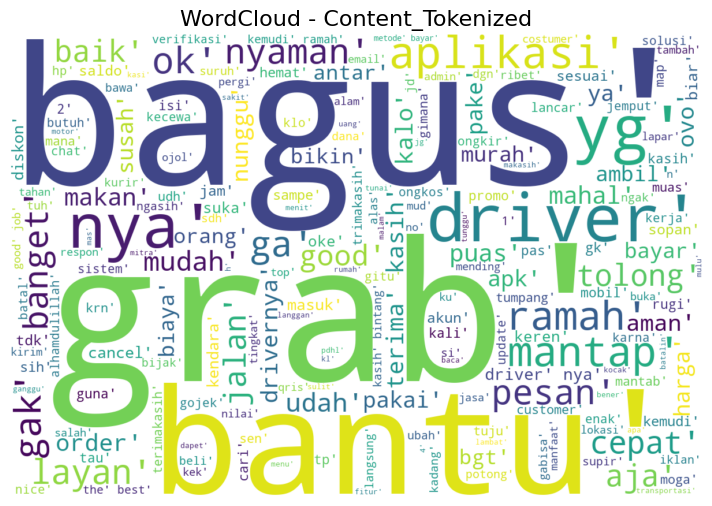

✅ WordCloud untuk 'Content_Tokenized' disimpan di:
D:\bgx\citha\Content_Tokenized_WordCloud.png


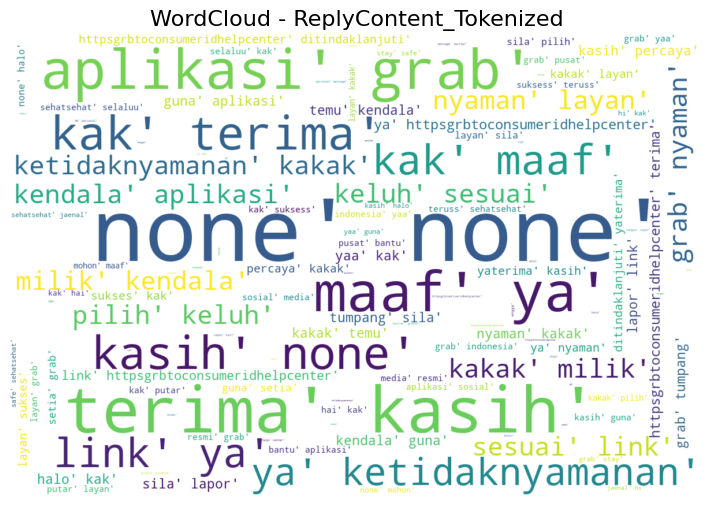

✅ WordCloud untuk 'ReplyContent_Tokenized' disimpan di:
D:\bgx\citha\ReplyContent_Tokenized_WordCloud.png


In [5]:
# === 5. WORDCLOUD VISUALIZATION ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

file_path = r'D:\bgx\citha\UlasanGRAB_Preproccesing.csv'
df = pd.read_csv(file_path)

output_folder = os.path.dirname(file_path)

def buat_wordcloud(teks, nama_output):
    if not teks.strip():
        print(f"⚠️ Tidak ada teks untuk {nama_output}.")
        return
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        colormap='viridis',
        max_words=200
    ).generate(teks)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {nama_output}', fontsize=16)
    plt.show()

    output_path = os.path.join(output_folder, f"{nama_output}_WordCloud.png")
    wordcloud.to_file(output_path)
    print(f"✅ WordCloud untuk '{nama_output}' disimpan di:\n{output_path}")

all_content_text = " ".join(df[kolom1].astype(str))
all_reply_text = " ".join(df[kolom2].astype(str))

buat_wordcloud(all_content_text, "Content_Tokenized")
buat_wordcloud(all_reply_text, "ReplyContent_Tokenized")

